In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Constants
EXP_DATA_DIR = "E:\\IITP\\Academics\\7th Semester 26 Jul'23 - 1 Dec'23\\BTP\\Experiment Data\\Plots"
THR_DATA_DIR = "E:\\IITP\\Academics\\7th Semester 26 Jul'23 - 1 Dec'23\\BTP\\TheoreticalPlotImages"
PHM_Test_3_DIR = "E:\\IITP\\Academics\\7th Semester 26 Jul'23 - 1 Dec'23\\BTP\\PHM Society Bearings Data\\test 3 plot images"
IMAGE_SIZE = (100, 100)

# Lists to store data
exp_data_list = []
thr_data_list = []
phm_test_3_data_list = []

# Dictionary to map the axis to a one-hot encoded list
axis_map = {
    "X": [1, 0, 0],
    "Y": [0, 1, 0],
    "Z": [0, 0, 1]
}

In [3]:
# Iterate over files to populate the list
for filename in os.listdir(THR_DATA_DIR):
    if filename.endswith(".png") and any(axis in filename for axis in ["X", "Y"]):

        # Split filename to extract details
        parts = filename.split("_")
        status = parts[0]
        hz = int(parts[1].split("-")[0].replace("Hz", ""))
        axis = filename.split("-")[1]

        # Set label based on status
        label = 1 if status == "faulty" else 0

        # Read and resize the image using TensorFlow
        path = os.path.join(THR_DATA_DIR, filename)
        image = tf.io.read_file(path)
        image = tf.image.decode_png(image, channels=1)  # Decoding to grayscale
        image = tf.image.resize(image, IMAGE_SIZE)
        image = tf.squeeze(image).numpy()  # Convert tensor to numpy array

        # Append to the data list
        thr_data_list.append([image, hz, label, axis_map[axis]])


In [4]:
# Iterate over files to populate the list
for filename in os.listdir(PHM_Test_3_DIR):
    if filename.endswith(".png"):

        # Split filename to extract details
#         parts = filename.split("_")
#         status = parts[0]
        hz = 33
        axis = "X"

        # Set label based on status
        label = 0

        # Read and resize the image using TensorFlow
        path = os.path.join(PHM_Test_3_DIR, filename)
        image = tf.io.read_file(path)
        image = tf.image.decode_png(image, channels=1)  # Decoding to grayscale
        image = tf.image.resize(image, IMAGE_SIZE)
        image = tf.squeeze(image).numpy()  # Convert tensor to numpy array

        # Append to the data list
        phm_test_3_data_list.append([image, hz, label, axis_map[axis]])


In [5]:
# # Iterate over files to populate the list
# for filename in os.listdir(EXP_DATA_DIR):
#     if filename.endswith(".png") and any(axis in filename for axis in ["X", "Y"]):

#         # Split filename to extract details
#         parts = filename.split("_")
#         status = parts[0]
#         hz = int(parts[1].split("-")[0].replace("Hz", ""))
#         axis = filename.split("-")[1]

#         # Set label based on status
#         label = 1 if status == "Faulty" else 0

#         # Read and resize the image using TensorFlow
#         path = os.path.join(EXP_DATA_DIR, filename)
#         image = tf.io.read_file(path)
#         image = tf.image.decode_png(image, channels=1)  # Decoding to grayscale
#         image = tf.image.resize(image, IMAGE_SIZE)
#         image = tf.squeeze(image).numpy()  # Convert tensor to numpy array

#         # Append to the data list
#         exp_data_list.append([image, hz, label, axis_map[axis]])


Theoretical Data Plots


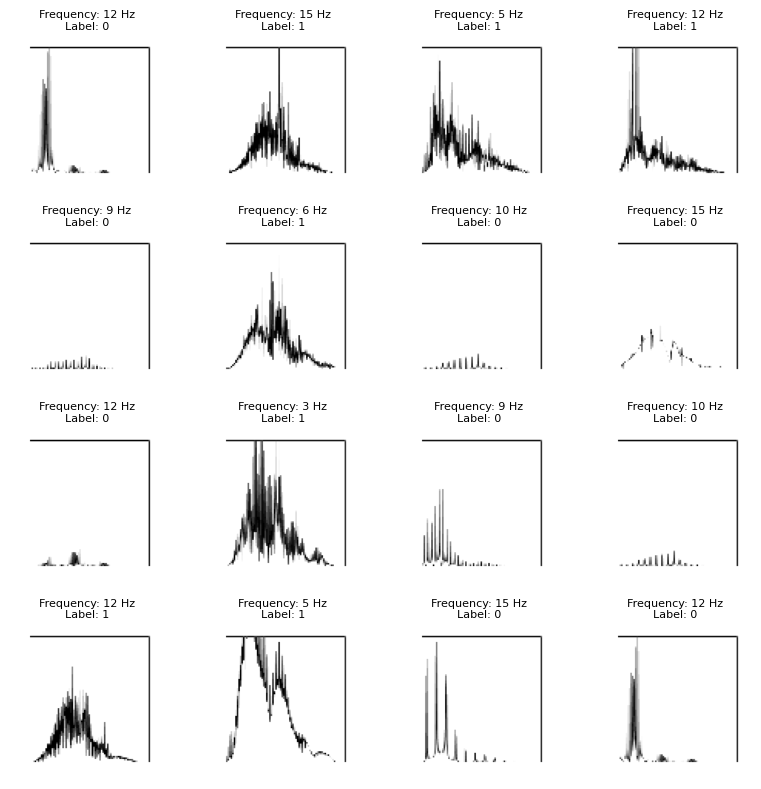

In [6]:
print('Theoretical Data Plots')
# Generate 16 random indices from test_list
random_indices = np.random.choice(len(thr_data_list), 16, replace=False)

fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    current_sample = thr_data_list[random_indices[i]]
    image, frequency, label, _ = current_sample

    ax.imshow(image, cmap="gray")
    ax.set_title(f"Frequency: {frequency} Hz\nLabel: {label}", fontsize=8)
    
    # Remove axis ticks
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
# print('Experimental Data Plots')
# # Generate 16 random indices from test_list
# random_indices = np.random.choice(len(exp_data_list), 16, replace=False)

# fig, axes = plt.subplots(4, 4, figsize=(8, 8))

# for i, ax in enumerate(axes.flat):
#     current_sample = exp_data_list[random_indices[i]]
#     image, frequency, label, _ = current_sample

#     ax.imshow(image, cmap="gray")
#     ax.set_title(f"Frequency: {frequency} Hz\nLabel: {label}", fontsize=8)
    
#     # Remove axis ticks
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

In [8]:
# Convert the data list to separate numpy arrays
thr_images = np.array([item[0] for item in thr_data_list])
thr_frequencies = np.array([item[1] for item in thr_data_list], dtype=np.int)
thr_labels = np.array([item[2] for item in thr_data_list], dtype=np.int)
thr_axes = np.array([item[3] for item in thr_data_list], dtype=np.int)

print('Theoretical Data Shapes')
print(thr_images.shape)
print(thr_frequencies.shape)
print(thr_labels.shape)
print(thr_axes.shape)

Theoretical Data Shapes
(1064, 100, 100)
(1064,)
(1064,)
(1064, 3)


C:\Users\Rudrransh\AppData\Local\Temp\ipykernel_18644\648198210.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  thr_frequencies = np.array([item[1] for item in thr_data_list], dtype=np.int)
C:\Users\Rudrransh\AppData\Local\Temp\ipykernel_18644\648198210.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to

In [9]:
# Convert the data list to separate numpy arrays
phm_t3_images = np.array([item[0] for item in phm_test_3_data_list])
phm_t3_frequencies = np.array([item[1] for item in phm_test_3_data_list], dtype=np.int)
phm_t3_labels = np.array([item[2] for item in phm_test_3_data_list], dtype=np.int)
phm_t3_axes = np.array([item[3] for item in phm_test_3_data_list], dtype=np.int)

print('PHM Test 2 Data Shapes')
print(phm_t3_images.shape)
print(phm_t3_frequencies.shape)
print(phm_t3_labels.shape)
print(phm_t3_axes.shape)

PHM Test 2 Data Shapes
(6323, 100, 100)
(6323,)
(6323,)
(6323, 3)


C:\Users\Rudrransh\AppData\Local\Temp\ipykernel_18644\3313131872.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  phm_t3_frequencies = np.array([item[1] for item in phm_test_3_data_list], dtype=np.int)
C:\Users\Rudrransh\AppData\Local\Temp\ipykernel_18644\3313131872.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If

In [10]:
# # Convert the data list to separate numpy arrays
# exp_images = np.array([item[0] for item in exp_data_list])
# exp_frequencies = np.array([item[1] for item in exp_data_list], dtype=np.int)
# exp_labels = np.array([item[2] for item in exp_data_list], dtype=np.int)
# exp_axes = np.array([item[3] for item in exp_data_list], dtype=np.int)

# print('Experimental Data Shapes')
# print(exp_images.shape)
# print(exp_frequencies.shape)
# print(exp_labels.shape)
# print(exp_axes.shape)

In [11]:
X_thr = [thr_images, thr_frequencies, thr_axes]
y_thr = thr_labels
# X_exp = [exp_images, exp_frequencies, exp_axes]
# y_exp = exp_labels

X_train = X_thr
y_train = y_thr
X_test = [phm_t3_images, phm_t3_frequencies, phm_t3_axes]

In [20]:
# CNN for the image input
image_input = layers.Input(shape=(100, 100, 1), name='image_input')

# # Augmentation layers
# x = layers.experimental.preprocessing.RandomCrop(80, 80)(image_input)  # Randomly crop images to size 80x80
# x = layers.experimental.preprocessing.RandomFlip(mode='horizontal')(x)  # Randomly flip images horizontally
# x = layers.experimental.preprocessing.RandomHeight(0.2)(x)  # Randomly vary image height by up to 10%
# x = layers.experimental.preprocessing.RandomRotation(0.1)(x)  # Randomly rotate images by up to 10 degrees
# x = layers.experimental.preprocessing.RandomTranslation(height_factor=0.2, width_factor=0.2)(x)  # Randomly translate images
# x = layers.experimental.preprocessing.RandomWidth(0.2)(x)  # Randomly vary image width by up to 10%
# x = layers.experimental.preprocessing.RandomZoom(0.2)(x)  # Randomly zoom images by up to 10%

x = layers.Conv2D(128, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
image_output = layers.Dense(32, activation='relu')(x)

# DNN for the frequency input
frequency_input = layers.Input(shape=(1,), name='frequency_input')
y = layers.Dense(32, activation='relu')(frequency_input)
frequency_output = layers.Dense(32, activation='relu')(y)

# DNN for the axis input
axis_input = layers.Input(shape=(3,), name='axis_input')
z = layers.Dense(32, activation='relu')(axis_input)
axis_output = layers.Dense(32, activation='relu')(z)

# Concatenate the outputs of all branches
combined = layers.concatenate([image_output, frequency_output, axis_output])
w = layers.Dense(32, activation='relu')(combined)
w = layers.Dense(16, activation='relu')(w)

# Output layer
output = layers.Dense(1, activation='sigmoid')(w)

model = Model(inputs=[image_input, frequency_input, axis_input], outputs=output)

In [21]:
# Define the optimizer with custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile the model using the custom optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

history = model.fit(X_train, y_train, epochs=10, shuffle = True)


Epoch 1/10
34/34 [==============================] - 6s 116ms/step - loss: 2.9565 - binary_accuracy: 0.6551
Epoch 2/10
34/34 [==============================] - 4s 124ms/step - loss: 0.0411 - binary_accuracy: 0.9944
Epoch 3/10
34/34 [==============================] - 4s 125ms/step - loss: 0.0121 - binary_accuracy: 1.0000
Epoch 4/10
34/34 [==============================] - 4s 129ms/step - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 5s 152ms/step - loss: 0.0047 - binary_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 4s 123ms/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 5s 133ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 8/10
34/34 [==============================] - 4s 107ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 9/10
34/34 [==============================] - 4s 103ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 10/10
34/34 [==================

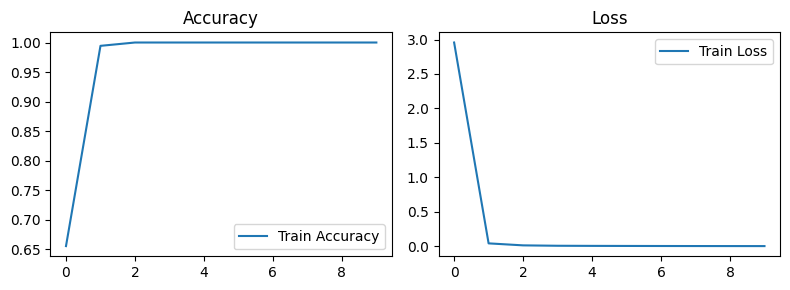

In [22]:
# Visualize the training history
plt.figure(figsize=(8, 3))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [23]:
# Predict classes
y_pred_probs = model.predict(X_test)


198/198 [==============================] - 6s 32ms/step


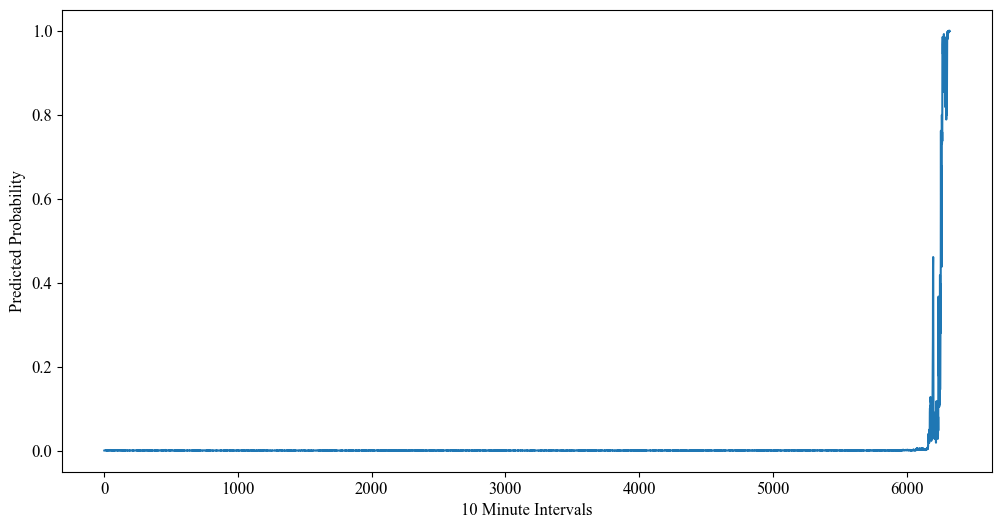

In [24]:
# Create a list of sample indices from 600 to the end
index = list(range(len(y_pred_probs)))

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the predicted probabilities
plt.plot(index, y_pred_probs)
plt.xlabel('10 Minute Intervals', fontname='Times New Roman', fontsize=12)
plt.ylabel('Predicted Probability', fontname='Times New Roman', fontsize=12)
# plt.title('Predicted Probabilities for Test 3 Bearing 3', fontname='Times New Roman', fontsize=12)
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.savefig('Test_3_Bearing_3_Probs.png', format='png', dpi = 600)
plt.show()



# y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

# # Generate classification report
# report = classification_report(y_test, y_pred_classes)

# print(report)# Predict classes

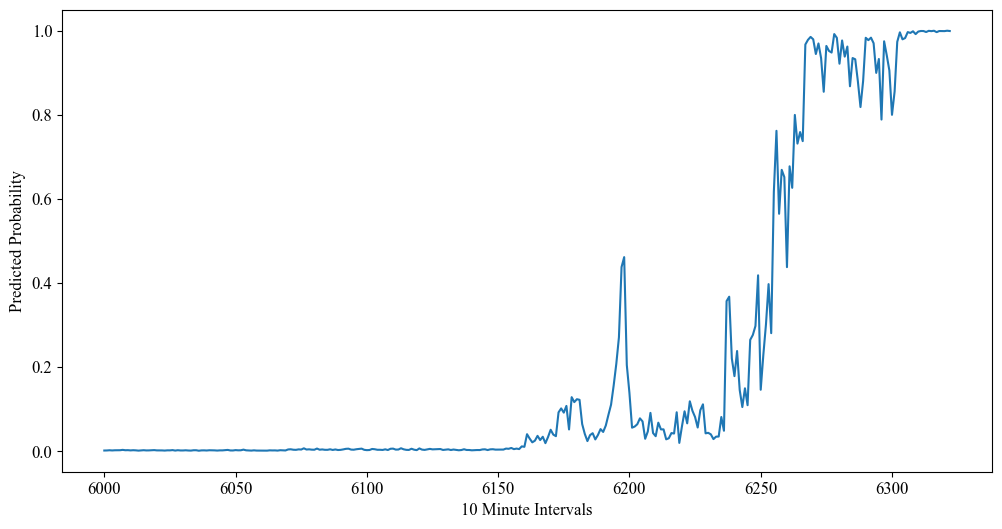

In [25]:
i=6000

# Slice the predicted probabilities from the 600th sample to the end
y_pred_probs_slice = y_pred_probs[i:]

# Create a list of sample indices from 600 to the end
sample_indices = list(range(i, len(y_pred_probs)))

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the sliced predicted probabilities with the updated sample indices
plt.plot(sample_indices, y_pred_probs_slice)
plt.xlabel('10 Minute Intervals', fontname='Times New Roman', fontsize=12)
plt.ylabel('Predicted Probability', fontname='Times New Roman', fontsize=12)
# plt.title(f'Predicted Probabilities for Test 3 Bearing 3 (Sample {i} to End)', fontname='Times New Roman', fontsize=12)
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.savefig('Test_3_Bearing_3_Probs_ZOOMED.png', format='png', dpi=600)
plt.show()

In [26]:
# # Generate some random indices from test data
# random_indices = np.random.choice(X_test[0].shape[0], 25, replace=False)

# fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# for i, ax in enumerate(axes.flat):
#     # For the sake of the example, let's assume test_images are grayscale 2D arrays. 
#     # If they are RGB, remove cmap="gray" from imshow
#     ax.imshow(X_test[0][random_indices[i]], cmap="gray")
    
#     # Set the title to show actual and predicted labels
#     actual_label = y_test[random_indices[i]]
#     predicted_label = y_pred_classes[random_indices[i]]
#     ax.set_title(f"True: {actual_label}\nPred: {predicted_label}", fontsize = 8)
    
#     # Remove axis ticks
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

In [27]:
# # Define the file path for saving the predicted probabilities
# output_file = "predicted_probabilities.txt"

# # Write the predicted probabilities to the text file
# with open(output_file, 'w') as f:
#     for prob in y_pred_probs:
#         f.write(str(prob) + '\n')

# print("Predicted probabilities saved to", output_file)